Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.decomposition import PCA
import umap

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.mixture import BayesianGaussianMixture
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    KFold,
    GridSearchCV,
    cross_val_score,
    cross_validate
)

from scipy.stats import ttest_ind

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pre-Processing

In [2]:
EEG_statistical = pd.read_csv(r'EEG_Features_All_Users.csv')
print(EEG_statistical)

       User  Page  Product  Bought  Electrode  Delta_FFT_Mean  Delta_FFT_Std  \
0       S01     1        1       0          1        9.508973      45.358536   
1       S01     1        1       0          2        8.168428      43.147535   
2       S01     1        1       0          3       18.030033      69.813462   
3       S01     1        1       0          4       14.585641      64.099895   
4       S01     1        1       0          5       10.254472      50.750271   
...     ...   ...      ...     ...        ...             ...            ...   
112798  S44     6       24       0         15        8.488705      38.371774   
112799  S44     6       24       0         16       10.662850      56.362082   
112800  S44     6       24       0         17       24.583730      99.558084   
112801  S44     6       24       0         18       12.080178      55.648732   
112802  S44     6       24       0         19       16.405316      69.617178   

        Delta_FFT_Skew  Delta_FFT_Kurt 

In [5]:
print(EEG_statistical.isnull().sum())

User                   0
Page                   0
Product                0
Bought                 0
Electrode              0
Delta_FFT_Mean         0
Delta_FFT_Std          0
Delta_FFT_Skew         0
Delta_FFT_Kurt         0
Delta_PSD_Mean         0
Delta_PSD_Std          0
Delta_PSD_Skew         0
Delta_PSD_Kurt         0
Theta_FFT_Mean         0
Theta_FFT_Std          0
Theta_FFT_Skew         0
Theta_FFT_Kurt         0
Theta_PSD_Mean         0
Theta_PSD_Std          0
Theta_PSD_Skew         0
Theta_PSD_Kurt         0
Alpha_FFT_Mean         0
Alpha_FFT_Std          0
Alpha_FFT_Skew         0
Alpha_FFT_Kurt         0
Alpha_PSD_Mean         0
Alpha_PSD_Std          0
Alpha_PSD_Skew         0
Alpha_PSD_Kurt         0
Beta_FFT_Mean          0
Beta_FFT_Std           0
Beta_FFT_Skew          0
Beta_FFT_Kurt          0
Beta_PSD_Mean          0
Beta_PSD_Std           0
Beta_PSD_Skew          0
Beta_PSD_Kurt          0
Gamma_FFT_Mean         0
Gamma_FFT_Std          0
Gamma_FFT_Skew         0


In [6]:
EEG_statistical = EEG_statistical.drop(columns=['Unnamed: 45'])
print(EEG_statistical.isnull().sum())

User              0
Page              0
Product           0
Bought            0
Electrode         0
Delta_FFT_Mean    0
Delta_FFT_Std     0
Delta_FFT_Skew    0
Delta_FFT_Kurt    0
Delta_PSD_Mean    0
Delta_PSD_Std     0
Delta_PSD_Skew    0
Delta_PSD_Kurt    0
Theta_FFT_Mean    0
Theta_FFT_Std     0
Theta_FFT_Skew    0
Theta_FFT_Kurt    0
Theta_PSD_Mean    0
Theta_PSD_Std     0
Theta_PSD_Skew    0
Theta_PSD_Kurt    0
Alpha_FFT_Mean    0
Alpha_FFT_Std     0
Alpha_FFT_Skew    0
Alpha_FFT_Kurt    0
Alpha_PSD_Mean    0
Alpha_PSD_Std     0
Alpha_PSD_Skew    0
Alpha_PSD_Kurt    0
Beta_FFT_Mean     0
Beta_FFT_Std      0
Beta_FFT_Skew     0
Beta_FFT_Kurt     0
Beta_PSD_Mean     0
Beta_PSD_Std      0
Beta_PSD_Skew     0
Beta_PSD_Kurt     0
Gamma_FFT_Mean    0
Gamma_FFT_Std     0
Gamma_FFT_Skew    0
Gamma_FFT_Kurt    0
Gamma_PSD_Mean    0
Gamma_PSD_Std     0
Gamma_PSD_Skew    0
Gamma_PSD_Kurt    0
dtype: int64


In [7]:
EEG_statistical['product_page'] = EEG_statistical['Page'].astype(str) + EEG_statistical['Product'].astype(str)
EEG_statistical['product_page'] = EEG_statistical['product_page'].astype(int)
print(EEG_statistical)

       User  Page  Product  Bought  Electrode  Delta_FFT_Mean  Delta_FFT_Std  \
0       S01     1        1       0          1        9.508973      45.358536   
1       S01     1        1       0          2        8.168428      43.147535   
2       S01     1        1       0          3       18.030033      69.813462   
3       S01     1        1       0          4       14.585641      64.099895   
4       S01     1        1       0          5       10.254472      50.750271   
...     ...   ...      ...     ...        ...             ...            ...   
112798  S44     6       24       0         15        8.488705      38.371774   
112799  S44     6       24       0         16       10.662850      56.362082   
112800  S44     6       24       0         17       24.583730      99.558084   
112801  S44     6       24       0         18       12.080178      55.648732   
112802  S44     6       24       0         19       16.405316      69.617178   

        Delta_FFT_Skew  Delta_FFT_Kurt 

In [8]:
EEG_statistical = EEG_statistical.drop(columns=['Product', 'Page'])
print(EEG_statistical)

       User  Bought  Electrode  Delta_FFT_Mean  Delta_FFT_Std  Delta_FFT_Skew  \
0       S01       0          1        9.508973      45.358536        5.921297   
1       S01       0          2        8.168428      43.147535        6.970475   
2       S01       0          3       18.030033      69.813462        6.252657   
3       S01       0          4       14.585641      64.099895        6.243320   
4       S01       0          5       10.254472      50.750271        7.235626   
...     ...     ...        ...             ...            ...             ...   
112798  S44       0         15        8.488705      38.371774        7.339014   
112799  S44       0         16       10.662850      56.362082        7.912645   
112800  S44       0         17       24.583730      99.558084        7.258539   
112801  S44       0         18       12.080178      55.648732        7.786577   
112802  S44       0         19       16.405316      69.617178        7.361201   

        Delta_FFT_Kurt  Del

In [9]:
EEG_statistical = EEG_statistical[[EEG_statistical.columns[0], 'product_page'] + EEG_statistical.columns.drop(['product_page', EEG_statistical.columns[0]]).tolist()]
print(EEG_statistical)

       User  product_page  Bought  Electrode  Delta_FFT_Mean  Delta_FFT_Std  \
0       S01            11       0          1        9.508973      45.358536   
1       S01            11       0          2        8.168428      43.147535   
2       S01            11       0          3       18.030033      69.813462   
3       S01            11       0          4       14.585641      64.099895   
4       S01            11       0          5       10.254472      50.750271   
...     ...           ...     ...        ...             ...            ...   
112798  S44           624       0         15        8.488705      38.371774   
112799  S44           624       0         16       10.662850      56.362082   
112800  S44           624       0         17       24.583730      99.558084   
112801  S44           624       0         18       12.080178      55.648732   
112802  S44           624       0         19       16.405316      69.617178   

        Delta_FFT_Skew  Delta_FFT_Kurt  Delta_PSD_M

In [10]:
print(EEG_statistical.head())

  User  product_page  Bought  Electrode  Delta_FFT_Mean  Delta_FFT_Std  \
0  S01            11       0          1        9.508973      45.358536   
1  S01            11       0          2        8.168428      43.147535   
2  S01            11       0          3       18.030033      69.813462   
3  S01            11       0          4       14.585641      64.099895   
4  S01            11       0          5       10.254472      50.750271   

   Delta_FFT_Skew  Delta_FFT_Kurt  Delta_PSD_Mean  Delta_PSD_Std  ...  \
0        5.921297       38.220067        0.050623       0.220831  ...   
1        6.970475       52.049297        0.040109       0.172629  ...   
2        6.252657       43.147208        0.122778       0.559109  ...   
3        6.243320       42.369334        0.094640       0.413396  ...   
4        7.235626       58.599525        0.068182       0.291021  ...   

   Beta_PSD_Skew  Beta_PSD_Kurt  Gamma_FFT_Mean  Gamma_FFT_Std  \
0       3.087483      11.468059        6.952856   

In [11]:
electrode_columns = [col for col in EEG_statistical.columns if col not in ['User', 'product_page', 'Bought', 'Electrode']]

df_pivoted = EEG_statistical.pivot_table(index=['User', 'product_page', 'Bought'], columns='Electrode', values=electrode_columns, aggfunc='first')

df_pivoted.columns = [f"{col[0]}_Electrode_{col[1]}" for col in df_pivoted.columns]

df_pivoted = df_pivoted.reset_index()

print(df_pivoted)

     User  product_page  Bought  Alpha_FFT_Kurt_Electrode_1  \
0     S01            11       0                   55.861846   
1     S01            12       0                   58.717416   
2     S01            13       0                   32.122167   
3     S01            14       1                   60.171645   
4     S01            15       0                   71.213070   
...   ...           ...     ...                         ...   
3247  S44           619       0                   78.724342   
3248  S44           620       1                   46.388328   
3249  S44           621       0                   46.940010   
3250  S44           622       0                   39.086126   
3251  S44           624       0                   46.849444   

      Alpha_FFT_Kurt_Electrode_2  Alpha_FFT_Kurt_Electrode_3  \
0                      62.472460                   59.333264   
1                      71.242460                   71.696123   
2                      32.668643                   

In [112]:
df_pivoted.to_csv(r'EEG_Features_All_Users_pivoted.csv')

Loading Data

In [4]:
df_pivoted = pd.read_csv(r'EEG_Features_All_Users_pivoted.csv')
print(df_pivoted)

      Unnamed: 0 User  product_page  Bought  Alpha_FFT_Kurt_Electrode_1  \
0              0  S01            11       0                   55.861846   
1              1  S01            12       0                   58.717416   
2              2  S01            13       0                   32.122167   
3              3  S01            14       1                   60.171645   
4              4  S01            15       0                   71.213070   
...          ...  ...           ...     ...                         ...   
3247        3247  S44           619       0                   78.724342   
3248        3248  S44           620       1                   46.388328   
3249        3249  S44           621       0                   46.940010   
3250        3250  S44           622       0                   39.086126   
3251        3251  S44           624       0                   46.849444   

      Alpha_FFT_Kurt_Electrode_2  Alpha_FFT_Kurt_Electrode_3  \
0                      62.472460   

In [5]:
X = df_pivoted.drop(columns=['User', 'product_page', 'Bought'])
y = df_pivoted[['Bought']]

In [6]:
X = X.drop(columns=['Unnamed: 0'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.to_csv(r'X_train.csv')
X_test.to_csv(r'X_test.csv')

Training Models with PCA and Correlation Matrix

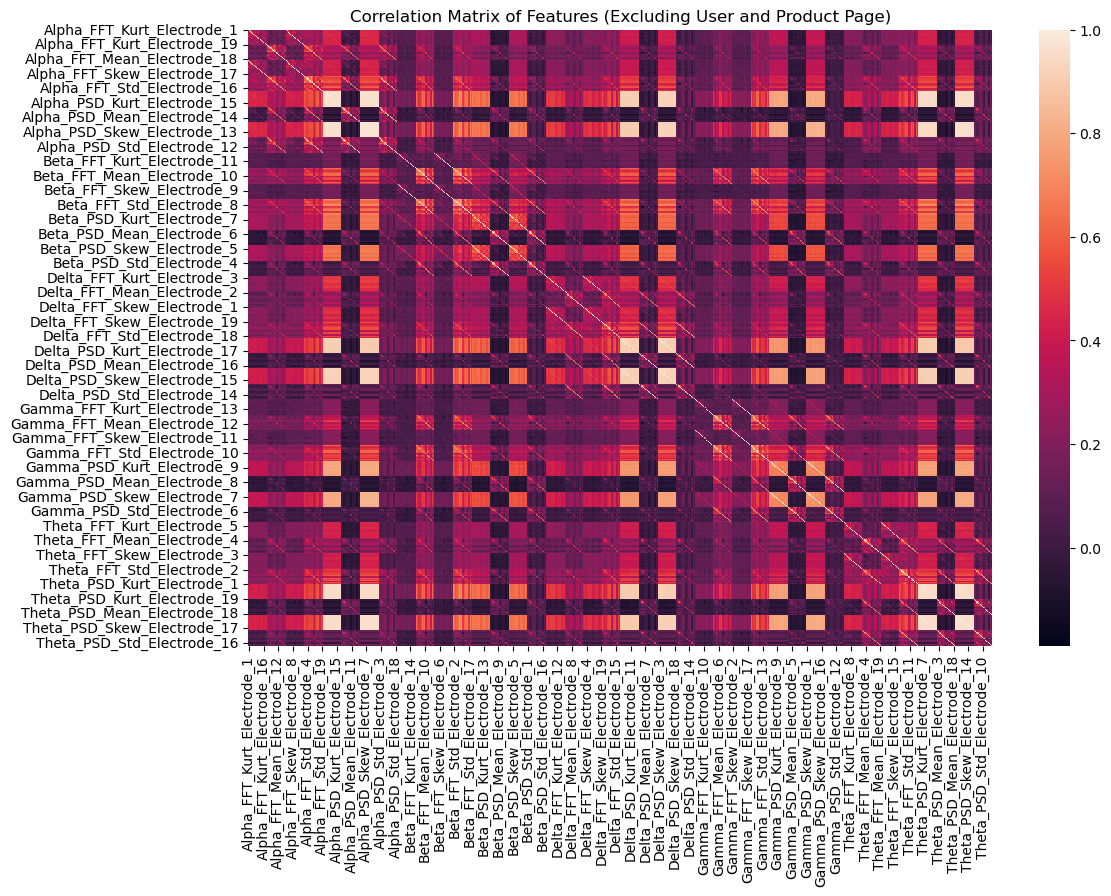

In [8]:
df_for_correlation = X_train

correlation_matrix = df_for_correlation.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix of Features (Excluding User and Product Page)')
plt.show()

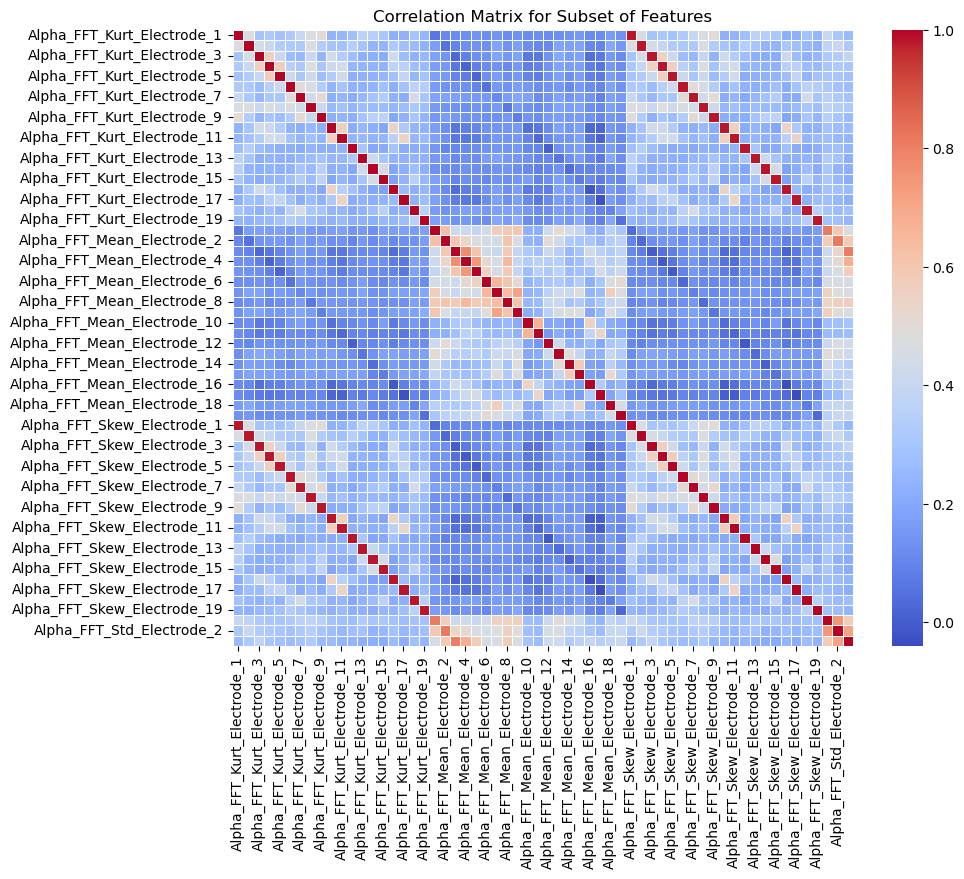

In [9]:
subset_columns = df_for_correlation.columns[:60] 

correlation_matrix_subset = df_for_correlation[subset_columns].corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix_subset, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)  
plt.title('Correlation Matrix for Subset of Features')  
plt.show()  

In [10]:
correlation_matrix = df_for_correlation.corr()

threshold = 0.90
to_drop = np.where(np.abs(correlation_matrix) > threshold)

to_drop = [(i, j) for i, j in zip(*to_drop) if i < j]

num_high_correlation = len(to_drop)

print(f"Number of pairs of columns with correlation above {threshold}: {num_high_correlation}")

Number of pairs of columns with correlation above 0.9: 5809


In [11]:
threshold = 0.90

high_correlation_pairs = np.where(np.abs(correlation_matrix) > threshold)

columns_to_drop = set()

for i, j in zip(*high_correlation_pairs):
    if i != j:  
        sum_corr_i = correlation_matrix.iloc[i].abs().sum()
        sum_corr_j = correlation_matrix.iloc[j].abs().sum()
        
        if sum_corr_i > sum_corr_j:
            columns_to_drop.add(df_for_correlation.columns[j])
        else:
            columns_to_drop.add(df_for_correlation.columns[i])

df_reduced_Train = df_for_correlation.drop(columns=columns_to_drop)
df_reduced_Test = X_test.drop(columns=columns_to_drop)

print(f"Removed columns: {columns_to_drop}")

Removed columns: {'Theta_PSD_Mean_Electrode_8', 'Beta_PSD_Kurt_Electrode_10', 'Gamma_FFT_Mean_Electrode_2', 'Delta_PSD_Skew_Electrode_4', 'Beta_PSD_Std_Electrode_19', 'Delta_PSD_Mean_Electrode_3', 'Alpha_PSD_Kurt_Electrode_19', 'Theta_PSD_Kurt_Electrode_12', 'Delta_FFT_Skew_Electrode_19', 'Gamma_FFT_Kurt_Electrode_16', 'Alpha_PSD_Mean_Electrode_7', 'Alpha_PSD_Kurt_Electrode_12', 'Alpha_PSD_Mean_Electrode_1', 'Delta_FFT_Skew_Electrode_18', 'Beta_FFT_Mean_Electrode_4', 'Theta_PSD_Kurt_Electrode_4', 'Theta_PSD_Skew_Electrode_5', 'Alpha_PSD_Skew_Electrode_15', 'Theta_PSD_Kurt_Electrode_10', 'Beta_PSD_Mean_Electrode_9', 'Delta_PSD_Skew_Electrode_2', 'Alpha_FFT_Skew_Electrode_7', 'Alpha_PSD_Kurt_Electrode_15', 'Delta_PSD_Mean_Electrode_9', 'Alpha_FFT_Skew_Electrode_12', 'Beta_FFT_Mean_Electrode_5', 'Alpha_PSD_Kurt_Electrode_7', 'Delta_FFT_Skew_Electrode_4', 'Gamma_PSD_Std_Electrode_10', 'Theta_FFT_Skew_Electrode_11', 'Theta_FFT_Skew_Electrode_9', 'Alpha_PSD_Mean_Electrode_18', 'Alpha_PSD_Mea

In [12]:
print(df_reduced_Train)
print(df_reduced_Test)

      Alpha_FFT_Kurt_Electrode_1  Alpha_FFT_Kurt_Electrode_2  \
3190                   36.937148                   24.278550   
1315                   40.269578                   28.139746   
1124                   62.529795                   35.109721   
765                    26.666549                   23.857499   
818                    37.651324                   48.916632   
...                          ...                         ...   
1095                   96.211389                   54.208070   
1130                   47.400559                   51.259801   
1294                   51.491195                   42.227645   
860                    20.726902                   35.118114   
3174                   23.087134                   25.070104   

      Alpha_FFT_Kurt_Electrode_3  Alpha_FFT_Kurt_Electrode_4  \
3190                   25.986863                   34.821193   
1315                   76.088895                   72.852800   
1124                   40.116532       

In [13]:
df_final_Train = df_reduced_Train
df_final_Test = df_reduced_Test

In [14]:
scaler = StandardScaler()

X_Train_scaledStandard = scaler.fit_transform(df_final_Train)

X_Test_scaledStandard = scaler.transform(df_final_Test)

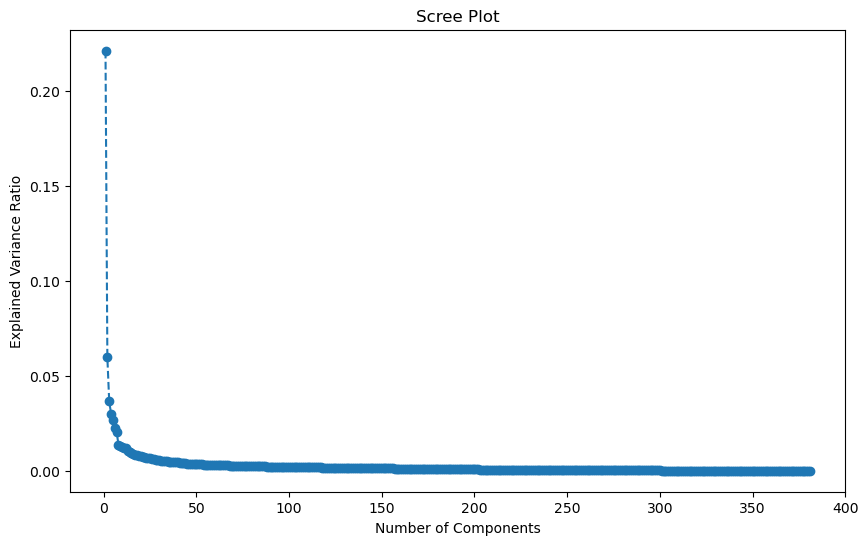

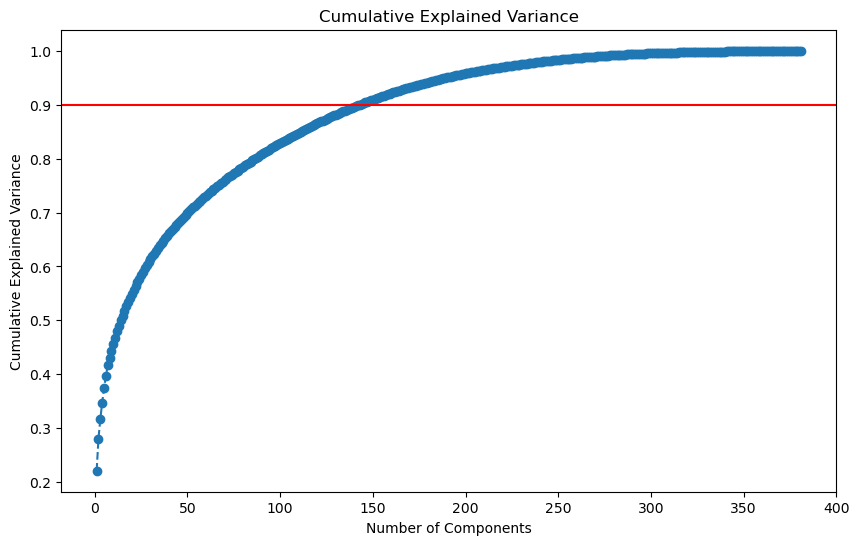

In [15]:
pca = PCA().fit(X_Train_scaledStandard)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

In [16]:
pca = PCA(n_components=0.90)

X_Train_pca = pca.fit_transform(X_Train_scaledStandard)
X_Test_pca = pca.transform(X_Test_scaledStandard)

n_components = pca.n_components_
pca_columns = [f'PC{i+1}' for i in range(n_components)]

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Each Component: {explained_variance}")

total_explained_variance = explained_variance.sum()
print(f"Total Explained Variance: {total_explained_variance:.4f}")
print(f"Number of Components used: {n_components}")

Explained Variance by Each Component: [0.22121817 0.05968239 0.03650161 0.03010286 0.02677167 0.02248275
 0.02039548 0.01371782 0.01310765 0.01241155 0.01177789 0.01174004
 0.01019555 0.00974506 0.00909029 0.00879358 0.00835002 0.00809701
 0.00763031 0.00756343 0.00743699 0.00710509 0.00691381 0.0067275
 0.0065468  0.00629913 0.00601228 0.00584447 0.00558928 0.00555071
 0.00536909 0.005175   0.00515832 0.0049544  0.00483379 0.00460775
 0.00458294 0.00449169 0.0044212  0.00435002 0.00429242 0.00416762
 0.0039142  0.00386258 0.00380754 0.00377856 0.00363049 0.00351681
 0.00349613 0.00342707 0.00339984 0.00337637 0.00330752 0.00328147
 0.00326514 0.00320344 0.00313502 0.00312836 0.00309959 0.00304569
 0.00299399 0.00297659 0.00290786 0.0028865  0.00285773 0.0028383
 0.00278648 0.0027566  0.00274747 0.00270868 0.0026536  0.00261248
 0.00258618 0.00255122 0.00252696 0.00250541 0.00247315 0.00244792
 0.00242086 0.002418   0.00238    0.00236397 0.00233462 0.00231804
 0.00229804 0.0022833  0.0

In [17]:
X_train = X_Train_pca
X_test = X_Test_pca

Models

In [18]:
results = []

models = {
    'LR': LogisticRegression(C=0.01, penalty='l2', solver='lbfgs', class_weight='balanced', max_iter=1000),
    
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean'),
    
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=5, random_state=42),
    
    'XGBoost': XGBClassifier(
        n_estimators=100, 
        max_depth=3, 
        learning_rate=0.01, 
        scale_pos_weight=2, 
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    
    'LightGBM': LGBMClassifier(
        n_estimators=200, 
        learning_rate=0.01, 
        max_depth=10, 
        is_unbalance=True,
        random_state=42
    ),
    
    'SVM_RBF': SVC(kernel='rbf', C=100, gamma='scale', probability=True, random_state=42),
    
    'Naïve Bayes': GaussianNB(var_smoothing=1e-09),
    
    'Gaussian Process': GaussianProcessClassifier(kernel=RBF(), max_iter_predict=100, multi_class='one_vs_rest', random_state=42)
}


kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Evaluating {name}:")

    scoring_metrics = ['accuracy', 'f1_weighted']
    cv_results = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring_metrics)

    mean_accuracy = cv_results['test_accuracy'].mean()
    mean_f1 = cv_results['test_f1_weighted'].mean()
    print(f"  Cross-validation Accuracy: {mean_accuracy:.4f}")
    print(f"  Cross-validation F1 Score: {mean_f1:.4f}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)  
    recall = recall_score(y_test, y_pred)  
    f1 = f1_score(y_test, y_pred, average='weighted')  

    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  Test Precision: {precision:.4f}")
    print(f"  Test Recall: {recall:.4f}")
    print(f"  Test F1 Score: {f1:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    report = classification_report(y_test, y_pred)
    results.append({
        "Model": name,
        "Test Accuracy": accuracy,
        "Test Precision": precision,
        "Test Recall": recall,
        "Test F1": f1,
        "Classification Report": report
    })
    df_results = pd.DataFrame(results)
    
    df_results.to_csv("PCA_Classical.csv", index=False)
    print("Results saved to PCA_Classical.csv")

    print()


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

Evaluating LR:
  Cross-validation Accuracy: 0.6228
  Cross-validation F1 Score: 0.6527
  Test Accuracy: 0.5929
  Test Precision: 0.2410
  Test Recall: 0.4412
  Test F1 Score: 0.3117
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       515
           1       0.24      0.44      0.31       136

    accuracy                           0.59       651
   macro avg       0.53      0.54      0.51       651
weighted avg       0.69      0.59      0.63       651

Results saved to PCA_Classical.csv

Evaluating KNN:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when

  Cross-validation Accuracy: 0.7389
  Cross-validation F1 Score: 0.7155
  Test Accuracy: 0.7419
  Test Precision: 0.2949
  Test Recall: 0.1691
  Test F1 Score: 0.2150
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       515
           1       0.29      0.17      0.21       136

    accuracy                           0.74       651
   macro avg       0.55      0.53      0.53       651
weighted avg       0.70      0.74      0.71       651

Results saved to PCA_Classical.csv

Evaluating Random Forest:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array wa

  Cross-validation Accuracy: 0.7847
  Cross-validation F1 Score: 0.6968


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


  Test Accuracy: 0.7865
  Test Precision: 0.2000
  Test Recall: 0.0074
  Test F1 Score: 0.0142
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       515
           1       0.20      0.01      0.01       136

    accuracy                           0.79       651
   macro avg       0.50      0.50      0.45       651
weighted avg       0.67      0.79      0.70       651

Results saved to PCA_Classical.csv

Evaluating XGBoost:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is dep

  Cross-validation Accuracy: 0.7709
  Cross-validation F1 Score: 0.7455
  Test Accuracy: 0.7496
  Test Precision: 0.3247
  Test Recall: 0.1838
  Test F1 Score: 0.2347
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       515
           1       0.32      0.18      0.23       136

    accuracy                           0.75       651
   macro avg       0.57      0.54      0.54       651
weighted avg       0.71      0.75      0.72       651

Results saved to PCA_Classical.csv

Evaluating LightGBM:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 438, number of negative: 1642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003860 sec

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 450, number of negative: 1631
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36465
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 143
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216242 -> initscore=-1.287701
[LightGBM] [Info] Start training from score -1.287701


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 465, number of negative: 1616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36465
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 143
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223450 -> initscore=-1.245672
[LightGBM] [Info] Start training from score -1.245672
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 443, number of negative: 1638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36465
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 143
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212878 -> initscore=-1.307661
[LightGBM] [Info] Start training from score -1.307661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36465
[LightGBM] [Info] Number of data points in the train set: 2601, number of used features: 143
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216455 -> initscore=-1.286445
[LightGBM] [Info] Start training from score -1.286445


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
  Test Accuracy: 0.7435
  Test Precision: 0.3402
  Test Recall: 0.2426
  Test F1 Score: 0.2833
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       515
           1       0.34      0.24      0.28       136

    accuracy                           0.74       651
   macro avg       0.58      0.56      0.56       651
weighted avg       0.72      0.74      0.73       651

Results saved to PCA_Classical.csv

Evaluating SVM_RBF:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d

  Cross-validation Accuracy: 0.7536
  Cross-validation F1 Score: 0.7193


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Test Accuracy: 0.7803
  Test Precision: 0.4364
  Test Recall: 0.1765
  Test F1 Score: 0.2513
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       515
           1       0.44      0.18      0.25       136

    accuracy                           0.78       651
   macro avg       0.62      0.56      0.56       651
weighted avg       0.73      0.78      0.74       651

Results saved to PCA_Classical.csv

Evaluating Naïve Bayes:
  Cross-validation Accuracy: 0.7274
  Cross-validation F1 Score: 0.7142
  Test Accuracy: 0.7296
  Test Precision: 0.3246
  Test Recall: 0.2721
  Test F1 Score: 0.2960
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       515
           1       0.32      0.27      0.30       136

    accuracy                           0.73       651
   macro avg       0.57      0.56      0.56       651
weighted avg       0.71      0.73

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d

Results saved to PCA_Classical.csv

Evaluating Gaussian Process:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d

  Cross-validation Accuracy: 0.6932
  Cross-validation F1 Score: 0.6893


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Test Accuracy: 0.6989
  Test Precision: 0.2692
  Test Recall: 0.2574
  Test F1 Score: 0.2632
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       515
           1       0.27      0.26      0.26       136

    accuracy                           0.70       651
   macro avg       0.54      0.54      0.54       651
weighted avg       0.69      0.70      0.70       651

Results saved to PCA_Classical.csv



In [17]:
models_params = {
    "LR": (LogisticRegression(class_weight='balanced', max_iter=1000), {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'], 
        'solver': ['lbfgs', 'saga']
    }),

    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),

    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),

    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'scale_pos_weight': [1, 2, 4] 
    }),

    "LightGBM": (LGBMClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [1, 10, 20],
        'learning_rate': [0.01, 0.1, 0.2],
        'is_unbalance': [True, False]
    }),

    "SVM-RBF": (SVC(kernel='rbf', probability=True, random_state=42), {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1]
    }),

    "Naïve Bayes": (GaussianNB(), {
        'var_smoothing': [1e-09, 1e-08, 1e-07]
    }),

    "Gaussian Process": (GaussianProcessClassifier(kernel=RBF(), random_state=42), {
        'max_iter_predict': [100, 200],
        'multi_class': ['one_vs_rest', 'one_vs_one']
    })
}

best_models = {}
F1_score_Results = {}

for name, (model, params) in models_params.items():
    print(f"\n Running GridSearch for {name}...")

    grid_search = GridSearchCV(model, params, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
    
    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f" Best Params for {name}: {best_params}")

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



 Running GridSearch for LR...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Best Params for LR: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

 Running GridSearch for KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 Best Params for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

 Running GridSearch for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


 Best Params for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}

 Running GridSearch for XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


 Best Params for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 2}

 Running GridSearch for LightGBM...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 563, number of negative: 2038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36465
[LightGBM] [Info] Number of data points in the train set: 2601, number of used features: 143
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216455 -> initscore=-1.286445
[LightGBM] [Info] Start training from score -1.286445
 Best Params for LightGBM: {'is_unbalance': True, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}

 Running GridSearch for SVM-RBF...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Best Params for SVM-RBF: {'C': 100, 'gamma': 'scale'}

 Running GridSearch for Naïve Bayes...
Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Best Params for Naïve Bayes: {'var_smoothing': 1e-09}

 Running GridSearch for Gaussian Process...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Best Params for Gaussian Process: {'max_iter_predict': 100, 'multi_class': 'one_vs_rest'}


In [48]:
results = []

def stacking_model(X_train, y_train, X_test, y_test, n_splits=5):
    base_models = [
        ("NB", GaussianNB(var_smoothing=1e-09)),
        ("LR", LogisticRegression(C=0.01, penalty='l2', solver='lbfgs', class_weight='balanced', max_iter=1000)),
        ("knn", KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')),
        ("lgbm", LGBMClassifier( n_estimators=200, learning_rate=0.01, max_depth=10, is_unbalance=True, random_state=42))
    ]

    meta_features_train = np.zeros((X_train.shape[0], len(base_models)))
    meta_features_test = np.zeros((X_test.shape[0], len(base_models)))
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    base_model_accuracies = {}
    
    for idx, (name, model) in enumerate(base_models):
        print(f"\nTraining base model: {name}")
        test_fold_preds = np.zeros((X_test.shape[0], n_splits))
        oof_preds = np.zeros(X_train.shape[0])
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
            X_tr, X_val = X_train[train_idx], X_train[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_tr, y_tr)

            if hasattr(model, "predict_proba"):
                val_preds = model.predict_proba(X_val)[:, 1]
                test_preds = model.predict_proba(X_test)[:, 1]
            else:
                val_preds = model.predict(X_val)
                test_preds = model.predict(X_test)

            oof_preds[val_idx] = val_preds
            meta_features_train[val_idx, idx] = val_preds
            test_fold_preds[:, fold] = test_preds
        
        meta_features_test[:, idx] = test_fold_preds.mean(axis=1)
        base_model_accuracies[name] = accuracy_score(y_train, (oof_preds > 0.5).astype(int))
    
    meta_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, scale_pos_weight=2, use_label_encoder=False,eval_metric='logloss', random_state=42)
    meta_oof_preds = np.zeros(X_train.shape[0])
    final_preds_proba = np.zeros(X_test.shape[0])
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(meta_features_train, y_train)):
        X_tr, X_val = meta_features_train[train_idx], meta_features_train[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        meta_model.fit(X_tr, y_tr)

        meta_oof_preds[val_idx] = meta_model.predict_proba(X_val)[:, 1]
        final_preds_proba += meta_model.predict_proba(meta_features_test)[:, 1] / n_splits

    meta_train_acc = accuracy_score(y_train, (meta_oof_preds > 0.5).astype(int))
    
    print("\nBase Model Accuracies:")
    for model_name, acc in base_model_accuracies.items():
        print(f"{model_name}: {acc:.4f}")
    
    print(f"\nMeta Model Training Accuracy: {meta_train_acc:.4f}")

    y_test_preds = (final_preds_proba > 0.5).astype(int)
    print("\nTest Set Evaluation:")
    print(f"Accuracy:  {accuracy_score(y_test, y_test_preds):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_preds, average='weighted'):.4f}")
    print(f"Recall:    {recall_score(y_test, y_test_preds, average='weighted'):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_test_preds, average='weighted'):.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_preds))

    accuracy = accuracy_score(y_test, y_test_preds)
    precision = precision_score(y_test, y_test_preds, average='weighted')
    recall = recall_score(y_test, y_test_preds, average='weighted')
    f1 = f1_score(y_test, y_test_preds, average='weighted')
    
    report = classification_report(y_test, y_test_preds)
    
    results.append({
        "Model": "Stacking",
        "Test Accuracy": accuracy,
        "Test Precision": precision,
        "Test Recall": recall,
        "Test F1": f1,
        "Classification Report": report
    })
    
    df_results = pd.DataFrame(results)
    df_results.to_csv("PCA_Ensemble.csv", index=False)
    print("Results saved to PCA_Ensemble.csv")


    return y_test_preds


In [50]:
stacking_preds = stacking_model(X_train, y_train, X_test, y_test)


Training base model: NB

Training base model: LR

Training base model: knn

Training base model: lgbm


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 450, number of negative: 1630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2080, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216346 -> initscore=-1.287088
[LightGBM] [Info] Start training from score -1.287088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.cla

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 451, number of negative: 1630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216723 -> initscore=-1.284868
[LightGBM] [Info] Start training from score

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.cla

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 451, number of negative: 1630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216723 -> initscore=-1.284868
[LightGBM] [Info] Start training from score

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 450, number of negative: 1631
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216242 -> initscore=-1.287701
[LightGBM] [Info] Start training from score -1.287701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Base Model Accuracies:
NB: 0.6578
LR: 0.6271
knn: 0.7463
lgbm: 0.7270

Meta Model Training Accuracy: 0.7586

Test Set Evaluation:
Accuracy:  0.7327
Precision: 0.7017
Recall:    0.7327
F1 Score:  0.7147

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       515
           1       0.30      0.21      0.25       136

    accuracy                           0.73       651
   macro avg       0.55      0.54      0.54       651
weighted avg       0.70      0.73      0.71       651

Results saved to PCA_Ensemble.csv


Training Models with UMAP and Correlation Matrix

In [30]:
df_pivoted = pd.read_csv(r'EEG_Features_All_Users_pivoted.csv')
print(df_pivoted)

      Unnamed: 0 User  product_page  Bought  Alpha_FFT_Kurt_Electrode_1  \
0              0  S01            11       0                   55.861846   
1              1  S01            12       0                   58.717416   
2              2  S01            13       0                   32.122167   
3              3  S01            14       1                   60.171645   
4              4  S01            15       0                   71.213070   
...          ...  ...           ...     ...                         ...   
3247        3247  S44           619       0                   78.724342   
3248        3248  S44           620       1                   46.388328   
3249        3249  S44           621       0                   46.940010   
3250        3250  S44           622       0                   39.086126   
3251        3251  S44           624       0                   46.849444   

      Alpha_FFT_Kurt_Electrode_2  Alpha_FFT_Kurt_Electrode_3  \
0                      62.472460   

In [31]:
X = df_pivoted.drop(columns=['User', 'product_page', 'Bought'])
y = df_pivoted[['Bought']]

In [32]:
X = X.drop(columns=['Unnamed: 0'])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

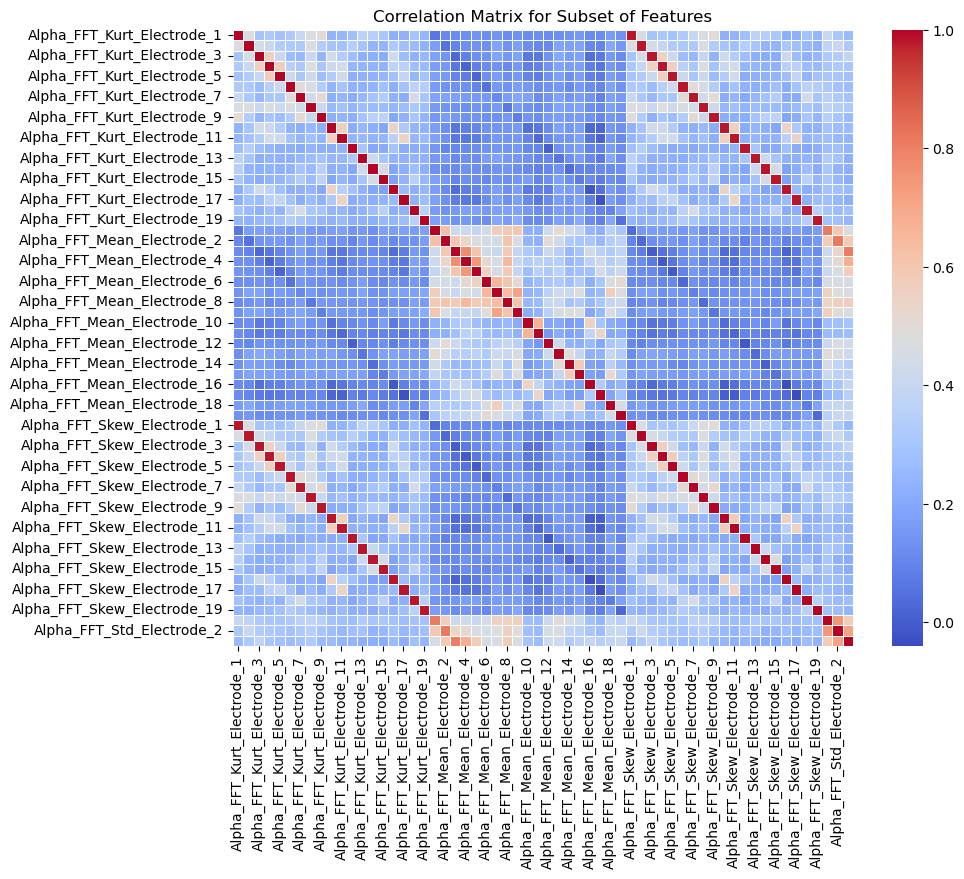

In [34]:
df_for_correlation = X_train

subset_columns = df_for_correlation.columns[:60]  

correlation_matrix_subset = df_for_correlation[subset_columns].corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix_subset, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # رسم نمودار
plt.title('Correlation Matrix for Subset of Features')  
plt.show()  

In [35]:
correlation_matrix = df_for_correlation.corr()

threshold = 0.90
to_drop = np.where(np.abs(correlation_matrix) > threshold)

to_drop = [(i, j) for i, j in zip(*to_drop) if i < j]

num_high_correlation = len(to_drop)

print(f"Number of pairs of columns with correlation above {threshold}: {num_high_correlation}")

Number of pairs of columns with correlation above 0.9: 5809


In [36]:
threshold = 0.90

high_correlation_pairs = np.where(np.abs(correlation_matrix) > threshold)

columns_to_drop = set()

for i, j in zip(*high_correlation_pairs):
    if i != j:
        sum_corr_i = correlation_matrix.iloc[i].abs().sum()
        sum_corr_j = correlation_matrix.iloc[j].abs().sum()
        
        if sum_corr_i > sum_corr_j:
            columns_to_drop.add(df_for_correlation.columns[j])
        else:
            columns_to_drop.add(df_for_correlation.columns[i])

df_reduced_Train = df_for_correlation.drop(columns=columns_to_drop)
df_reduced_Test = X_test.drop(columns=columns_to_drop)

print(f"Removed columns: {columns_to_drop}")

Removed columns: {'Beta_FFT_Mean_Electrode_4', 'Delta_PSD_Kurt_Electrode_5', 'Theta_PSD_Mean_Electrode_4', 'Beta_PSD_Kurt_Electrode_14', 'Gamma_PSD_Std_Electrode_5', 'Gamma_FFT_Mean_Electrode_14', 'Delta_PSD_Skew_Electrode_6', 'Theta_PSD_Kurt_Electrode_14', 'Beta_FFT_Kurt_Electrode_18', 'Beta_FFT_Kurt_Electrode_6', 'Beta_PSD_Kurt_Electrode_17', 'Theta_FFT_Skew_Electrode_2', 'Alpha_PSD_Skew_Electrode_18', 'Alpha_PSD_Kurt_Electrode_2', 'Delta_PSD_Mean_Electrode_4', 'Delta_PSD_Kurt_Electrode_4', 'Alpha_PSD_Skew_Electrode_7', 'Gamma_FFT_Kurt_Electrode_19', 'Theta_PSD_Mean_Electrode_8', 'Theta_PSD_Kurt_Electrode_13', 'Beta_PSD_Mean_Electrode_8', 'Theta_PSD_Mean_Electrode_18', 'Gamma_FFT_Kurt_Electrode_9', 'Alpha_PSD_Mean_Electrode_12', 'Delta_FFT_Skew_Electrode_7', 'Beta_FFT_Mean_Electrode_3', 'Alpha_PSD_Skew_Electrode_5', 'Gamma_PSD_Kurt_Electrode_16', 'Gamma_PSD_Kurt_Electrode_6', 'Gamma_PSD_Kurt_Electrode_17', 'Delta_PSD_Skew_Electrode_19', 'Gamma_FFT_Kurt_Electrode_5', 'Delta_PSD_Kurt_E

In [37]:
print(df_reduced_Train)
print(df_reduced_Test)

      Alpha_FFT_Kurt_Electrode_1  Alpha_FFT_Kurt_Electrode_2  \
3190                   36.937148                   24.278550   
1315                   40.269578                   28.139746   
1124                   62.529795                   35.109721   
765                    26.666549                   23.857499   
818                    37.651324                   48.916632   
...                          ...                         ...   
1095                   96.211389                   54.208070   
1130                   47.400559                   51.259801   
1294                   51.491195                   42.227645   
860                    20.726902                   35.118114   
3174                   23.087134                   25.070104   

      Alpha_FFT_Kurt_Electrode_3  Alpha_FFT_Kurt_Electrode_4  \
3190                   25.986863                   34.821193   
1315                   76.088895                   72.852800   
1124                   40.116532       

In [38]:
df_final_Train = df_reduced_Train
df_final_Test = df_reduced_Test

In [39]:
scaler = StandardScaler()

X_Train_scaledStandard = scaler.fit_transform(df_final_Train)

X_Test_scaledStandard = scaler.transform(df_final_Test)

In [40]:
n_components_umap = 50
umap_model = umap.UMAP(n_components=n_components_umap, random_state=42)

X_Train_umap = umap_model.fit_transform(X_Train_scaledStandard)
X_Test_umap = umap_model.transform(X_Test_scaledStandard)

umap_columns = [f'UMAP{i+1}' for i in range(n_components_umap)]
X_umap_df = pd.DataFrame(data=X_Train_umap, columns=umap_columns)

print("UMAP Components:")
print(X_umap_df.head())

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP Components:
      UMAP1     UMAP2     UMAP3     UMAP4     UMAP5     UMAP6     UMAP7  \
0  0.042097  5.523539 -6.296626 -1.107714  4.448623 -0.378462 -3.078416   
1  0.410520  5.613945 -5.964725 -1.095094  4.519973  0.123453 -2.771490   
2 -0.017128  5.279662 -6.246282 -1.237422  4.311502 -0.822435 -2.663097   
3 -0.182565  5.697195 -5.026514 -1.185020  4.513893  0.433826 -2.850931   
4  0.950413  6.189520 -4.317854 -0.710919  4.518769  1.238197 -2.077350   

      UMAP8     UMAP9    UMAP10  ...    UMAP41    UMAP42    UMAP43    UMAP44  \
0  6.527840  7.131645  4.766085  ...  4.927911  2.709407  5.500691  3.947917   
1  6.481624  7.403069  4.454846  ...  4.978532  2.813553  5.455808  3.830630   
2  6.405137  7.271521  4.659385  ...  5.238633  2.730078  5.331065  3.935409   
3  6.477252  7.074916  4.745027  ...  4.974864  2.768212  5.687851  4.121542   
4  6.131073  7.261480  3.969192  ...  5.157482  3.043672  5.396661  4.059769   

     UMAP45    UMAP46    UMAP47    UMAP48    UMAP49

In [41]:
X_train = X_Train_umap
X_test = X_Test_umap

In [42]:
results = []

models = {
    'LR': LogisticRegression(C=100, penalty='l2', solver='lbfgs', class_weight='balanced', max_iter=1000),
    
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean'),
    
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=5, random_state=42),
    
    'XGBoost': XGBClassifier(
        n_estimators=200,
        max_depth=3,
        learning_rate=0.01,
        scale_pos_weight=2,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    
    'LightGBM': LGBMClassifier(
        n_estimators=100,
        learning_rate=0.01,
        max_depth=20,
        is_unbalance=True,
        random_state=42
    ),
    
    'SVM_RBF': SVC(kernel='rbf', C=10, gamma=1, probability=True, random_state=42),
    
    'Naïve Bayes': GaussianNB(var_smoothing=1e-09),
    
    'Gaussian Process': GaussianProcessClassifier(kernel=RBF(), max_iter_predict=100, multi_class='one_vs_rest', random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Evaluating {name}:")

    scoring_metrics = ['accuracy', 'f1_weighted']
    cv_results = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring_metrics)

    mean_accuracy = cv_results['test_accuracy'].mean()
    mean_f1 = cv_results['test_f1_weighted'].mean()
    print(f"  Cross-validation Accuracy: {mean_accuracy:.4f}")
    print(f"  Cross-validation F1 Score: {mean_f1:.4f}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  
    recall = recall_score(y_test, y_pred, average='weighted')  
    f1 = f1_score(y_test, y_pred, average='weighted')  

    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  Test Precision: {precision:.4f}")
    print(f"  Test Recall: {recall:.4f}")
    print(f"  Test F1 Score: {f1:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    report = classification_report(y_test, y_pred)
    results.append({
        "Model": name,
        "Test Accuracy": accuracy,
        "Test Precision": precision,
        "Test Recall": recall,
        "Test F1": f1,
        "Classification Report": report
    })
    df_results = pd.DataFrame(results)
    
    df_results.to_csv("UMAP_Classical.csv", index=False)
    print("Results saved to UMAP_Classical.csv")


    print()


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluating LR:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarni

  Cross-validation Accuracy: 0.6244
  Cross-validation F1 Score: 0.6555


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Test Accuracy: 0.5991
  Test Precision: 0.7093
  Test Recall: 0.5991
  Test F1 Score: 0.6347
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       515
           1       0.26      0.51      0.35       136

    accuracy                           0.60       651
   macro avg       0.54      0.57      0.53       651
weighted avg       0.71      0.60      0.63       651

Results saved to UMAP_Classical.csv

Evaluating KNN:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when

  Cross-validation Accuracy: 0.7370
  Cross-validation F1 Score: 0.7156
  Test Accuracy: 0.7450
  Test Precision: 0.7026
  Test Recall: 0.7450
  Test F1 Score: 0.7185
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       515
           1       0.31      0.18      0.23       136

    accuracy                           0.75       651
   macro avg       0.56      0.54      0.54       651
weighted avg       0.70      0.75      0.72       651

Results saved to UMAP_Classical.csv

Evaluating Random Forest:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array

  Cross-validation Accuracy: 0.7655
  Cross-validation F1 Score: 0.7195


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


  Test Accuracy: 0.7235
  Test Precision: 0.6768
  Test Recall: 0.7235
  Test F1 Score: 0.6961
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       515
           1       0.23      0.14      0.17       136

    accuracy                           0.72       651
   macro avg       0.51      0.51      0.50       651
weighted avg       0.68      0.72      0.70       651

Results saved to UMAP_Classical.csv

Evaluating XGBoost:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is dep

  Cross-validation Accuracy: 0.7570
  Cross-validation F1 Score: 0.7354
  Test Accuracy: 0.7527
  Test Precision: 0.7151
  Test Recall: 0.7527
  Test F1 Score: 0.7288
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       515
           1       0.35      0.21      0.26       136

    accuracy                           0.75       651
   macro avg       0.58      0.55      0.56       651
weighted avg       0.72      0.75      0.73       651

Results saved to UMAP_Classical.csv

Evaluating LightGBM:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 438, number of negative: 1642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000950 se

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 465, number of negative: 1616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223450 -> initscore=-1.245672
[LightGBM] [Info] Start training from score -1.245672
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 443, number of negative: 1638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212878 -> initscore=-1.307661
[LightGBM] [Info] Start training from score -1.307661
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
  Test Accuracy: 0.7711
  Test Precision: 0.7215
  Test Recall: 0.7711
  Test F1 Score: 0.7339
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       515
           1       0.39      0.17      0.24       136

    accuracy                           0.77       651
   macro avg       0.60      0.55      0.55       651
weighted avg       0.72      0.77      0.73       651

Results saved to UMAP_Classical.csv

Evaluating SVM_RBF:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d

  Cross-validation Accuracy: 0.7782
  Cross-validation F1 Score: 0.7117


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Test Accuracy: 0.7849
  Test Precision: 0.6973
  Test Recall: 0.7849
  Test F1 Score: 0.7064
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       515
           1       0.33      0.03      0.05       136

    accuracy                           0.78       651
   macro avg       0.56      0.51      0.47       651
weighted avg       0.70      0.78      0.71       651

Results saved to UMAP_Classical.csv

Evaluating Naïve Bayes:
  Cross-validation Accuracy: 0.6567
  Cross-validation F1 Score: 0.6809
  Test Accuracy: 0.6237
  Test Precision: 0.6968
  Test Recall: 0.6237
  Test F1 Score: 0.6515
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       515
           1       0.25      0.41      0.31       136

    accuracy                           0.62       651
   macro avg       0.53      0.55      0.53       651
weighted avg       0.70      0.6

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d

  Cross-validation Accuracy: 0.7820
  Cross-validation F1 Score: 0.6992


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Test Accuracy: 0.7926
  Test Precision: 0.7536
  Test Recall: 0.7926
  Test F1 Score: 0.7080
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       515
           1       0.60      0.02      0.04       136

    accuracy                           0.79       651
   macro avg       0.70      0.51      0.46       651
weighted avg       0.75      0.79      0.71       651

Results saved to UMAP_Classical.csv



In [33]:
models_params = {
    "LR": (LogisticRegression(class_weight='balanced', max_iter=1000), {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'], 
        'solver': ['lbfgs', 'saga']
    }),

    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),

    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),

    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'scale_pos_weight': [1, 2, 4] 
    }),

    "LightGBM": (LGBMClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [1, 10, 20],
        'learning_rate': [0.01, 0.1, 0.2],
        'is_unbalance': [True, False]
    }),

    "SVM-RBF": (SVC(kernel='rbf', probability=True, random_state=42), {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1]
    }),

    "Naïve Bayes": (GaussianNB(), {
        'var_smoothing': [1e-09, 1e-08, 1e-07]
    }),

    "Gaussian Process": (GaussianProcessClassifier(kernel=RBF(), random_state=42), {
        'max_iter_predict': [100, 200],
        'multi_class': ['one_vs_rest', 'one_vs_one']
    })
}

best_models = {}
F1_score_Results = {}

for name, (model, params) in models_params.items():
    print(f"\n Running GridSearch for {name}...")

    grid_search = GridSearchCV(model, params, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
    
    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f" Best Params for {name}: {best_params}")

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



 Running GridSearch for LR...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Best Params for LR: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

 Running GridSearch for KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 Best Params for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

 Running GridSearch for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


 Best Params for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

 Running GridSearch for XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


 Best Params for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 2}

 Running GridSearch for LightGBM...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 563, number of negative: 2038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2601, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216455 -> initscore=-1.286445
[LightGBM] [Info] Start training from score -1.286445
 Best Params for LightGBM: {'is_unbalance': True, 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 100}

 Running GridSearch for SVM-RBF...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Best Params for SVM-RBF: {'C': 10, 'gamma': 1}

 Running GridSearch for Naïve Bayes...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
 Best Params for Naïve Bayes: {'var_smoothing': 1e-09}

 Running GridSearch for Gaussian Process...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Best Params for Gaussian Process: {'max_iter_predict': 100, 'multi_class': 'one_vs_rest'}


In [51]:
results = []

def stacking_model(X_train, y_train, X_test, y_test, n_splits=5):
    base_models = [
        ("NB", GaussianNB(var_smoothing=1e-09)),
        ("LR", LogisticRegression(C=100, penalty='l2', solver='lbfgs', class_weight='balanced', max_iter=1000)),
        ("knn", KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')),
        ("lgbm", LGBMClassifier(n_estimators=100, learning_rate=0.01, max_depth=20, is_unbalance=True, random_state=42))
    ]

    meta_features_train = np.zeros((X_train.shape[0], len(base_models)))
    meta_features_test = np.zeros((X_test.shape[0], len(base_models)))
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    base_model_accuracies = {}
    
    for idx, (name, model) in enumerate(base_models):
        print(f"\nTraining base model: {name}")
        test_fold_preds = np.zeros((X_test.shape[0], n_splits))
        oof_preds = np.zeros(X_train.shape[0])
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
            X_tr, X_val = X_train[train_idx], X_train[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_tr, y_tr)

            if hasattr(model, "predict_proba"):
                val_preds = model.predict_proba(X_val)[:, 1]
                test_preds = model.predict_proba(X_test)[:, 1]
            else:
                val_preds = model.predict(X_val)
                test_preds = model.predict(X_test)

            oof_preds[val_idx] = val_preds
            meta_features_train[val_idx, idx] = val_preds
            test_fold_preds[:, fold] = test_preds
        
        meta_features_test[:, idx] = test_fold_preds.mean(axis=1)
        base_model_accuracies[name] = accuracy_score(y_train, (oof_preds > 0.5).astype(int))
    
    meta_model = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, scale_pos_weight=2, use_label_encoder=False, eval_metric='logloss', random_state=42)
    meta_oof_preds = np.zeros(X_train.shape[0])
    final_preds_proba = np.zeros(X_test.shape[0])
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(meta_features_train, y_train)):
        X_tr, X_val = meta_features_train[train_idx], meta_features_train[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        meta_model.fit(X_tr, y_tr)

        meta_oof_preds[val_idx] = meta_model.predict_proba(X_val)[:, 1]
        final_preds_proba += meta_model.predict_proba(meta_features_test)[:, 1] / n_splits

    meta_train_acc = accuracy_score(y_train, (meta_oof_preds > 0.5).astype(int))
    
    print("\nBase Model Accuracies:")
    for model_name, acc in base_model_accuracies.items():
        print(f"{model_name}: {acc:.4f}")
    
    print(f"\nMeta Model Training Accuracy: {meta_train_acc:.4f}")

    y_test_preds = (final_preds_proba > 0.5).astype(int)
    print("\nTest Set Evaluation:")
    print(f"Accuracy:  {accuracy_score(y_test, y_test_preds):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_preds, average='weighted'):.4f}")
    print(f"Recall:    {recall_score(y_test, y_test_preds, average='weighted'):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_test_preds, average='weighted'):.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_preds))
    
    accuracy = accuracy_score(y_test, y_test_preds)
    precision = precision_score(y_test, y_test_preds, average='weighted')
    recall = recall_score(y_test, y_test_preds, average='weighted')
    f1 = f1_score(y_test, y_test_preds, average='weighted')
    
    report = classification_report(y_test, y_test_preds)
    
    results.append({
        "Model": "Stacking",
        "Test Accuracy": accuracy,
        "Test Precision": precision,
        "Test Recall": recall,
        "Test F1": f1,
        "Classification Report": report
    })
    
    df_results = pd.DataFrame(results)
    df_results.to_csv("UMAP_Ensemble.csv", index=False)
    print("Results saved to UMAP_Ensemble.csv")

    return y_test_preds


In [52]:
stacking_preds = stacking_model(X_train, y_train, X_test, y_test)


Training base model: NB

Training base model: LR


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d


Training base model: knn

Training base model: lgbm
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 450, number of negative: 1630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2080, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216346 -> initscore=-1.287088
[LightGBM] [Info] Start training from score -1.287088
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicit

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 451, number of negative: 1630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216723 -> initscore=-1.284868
[LightGBM] [Info] Start training from score

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.cla

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 450, number of negative: 1631
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216242 -> initscore=-1.287701
[LightGBM] [Info] Start training from score

Training Models with PCA and Top100 features

In [53]:
df_pivoted = pd.read_csv(r'EEG_Features_All_Users_pivoted.csv')
print(df_pivoted)

      Unnamed: 0 User  product_page  Bought  Alpha_FFT_Kurt_Electrode_1  \
0              0  S01            11       0                   55.861846   
1              1  S01            12       0                   58.717416   
2              2  S01            13       0                   32.122167   
3              3  S01            14       1                   60.171645   
4              4  S01            15       0                   71.213070   
...          ...  ...           ...     ...                         ...   
3247        3247  S44           619       0                   78.724342   
3248        3248  S44           620       1                   46.388328   
3249        3249  S44           621       0                   46.940010   
3250        3250  S44           622       0                   39.086126   
3251        3251  S44           624       0                   46.849444   

      Alpha_FFT_Kurt_Electrode_2  Alpha_FFT_Kurt_Electrode_3  \
0                      62.472460   

In [54]:
X = df_pivoted.drop(columns=['User', 'product_page', 'Bought'])
y = df_pivoted[['Bought']]

In [55]:
X = X.drop(columns=['Unnamed: 0'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
y_labels = y_train["Bought"]

print(X_train.isna().any().any())
print(X_train.isna().sum().sum())
print((X_train.std() == 0).sum())

X_train_clean = X_train.dropna(axis=1)

X_train_clean = X_train_clean.loc[:, X_train_clean.std() != 0]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_clean),
                              columns=X_train_clean.columns,
                              index=X_train_clean.index)

X_train_scaled = X_train_scaled.reset_index(drop=True)
y_labels = y_labels.reset_index(drop=True)

X0 = X_train_scaled[y_labels == 0]
X1 = X_train_scaled[y_labels == 1]

mean_diff = X1.mean() - X0.mean()
abs_mean_diff = mean_diff.abs()
t_values, p_values = ttest_ind(X1, X0, equal_var=False, nan_policy='omit')

results_df = pd.DataFrame({
    'mean_diff': mean_diff,
    'abs_mean_diff': abs_mean_diff,
    't_value': t_values,
    'p_value': p_values
}, index=X_train_scaled.columns)

significant_features = results_df[results_df['p_value'] < 0.05]
results_df_sorted = significant_features.reindex(significant_features['t_value'].abs().sort_values(ascending=False).index)

top_100_features = results_df_sorted.head(100).index.tolist()

print("Top 100 Features:", top_100_features)

False
0
0
Top 100 Features: ['Alpha_PSD_Skew_Electrode_11', 'Theta_PSD_Skew_Electrode_3', 'Alpha_PSD_Skew_Electrode_8', 'Alpha_PSD_Skew_Electrode_10', 'Alpha_PSD_Skew_Electrode_15', 'Alpha_PSD_Skew_Electrode_3', 'Theta_PSD_Skew_Electrode_14', 'Theta_PSD_Skew_Electrode_12', 'Theta_PSD_Skew_Electrode_4', 'Theta_PSD_Skew_Electrode_17', 'Alpha_PSD_Skew_Electrode_5', 'Theta_PSD_Skew_Electrode_19', 'Alpha_PSD_Skew_Electrode_14', 'Theta_PSD_Skew_Electrode_15', 'Alpha_PSD_Skew_Electrode_2', 'Theta_PSD_Skew_Electrode_10', 'Alpha_PSD_Skew_Electrode_4', 'Alpha_PSD_Skew_Electrode_17', 'Alpha_PSD_Skew_Electrode_19', 'Theta_PSD_Skew_Electrode_5', 'Alpha_PSD_Skew_Electrode_16', 'Theta_PSD_Skew_Electrode_6', 'Theta_PSD_Skew_Electrode_13', 'Alpha_PSD_Skew_Electrode_1', 'Alpha_PSD_Skew_Electrode_9', 'Theta_PSD_Skew_Electrode_8', 'Theta_PSD_Skew_Electrode_7', 'Theta_PSD_Skew_Electrode_11', 'Alpha_PSD_Skew_Electrode_12', 'Theta_PSD_Skew_Electrode_16', 'Alpha_PSD_Skew_Electrode_18', 'Theta_PSD_Skew_Electro

In [58]:
top_100_features = results_df_sorted.head(100).index

X_train_top100 = X_train_clean[top_100_features]

X_test_top100 = X_test[top_100_features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top100)

X_test_scaled = scaler.transform(X_test_top100)

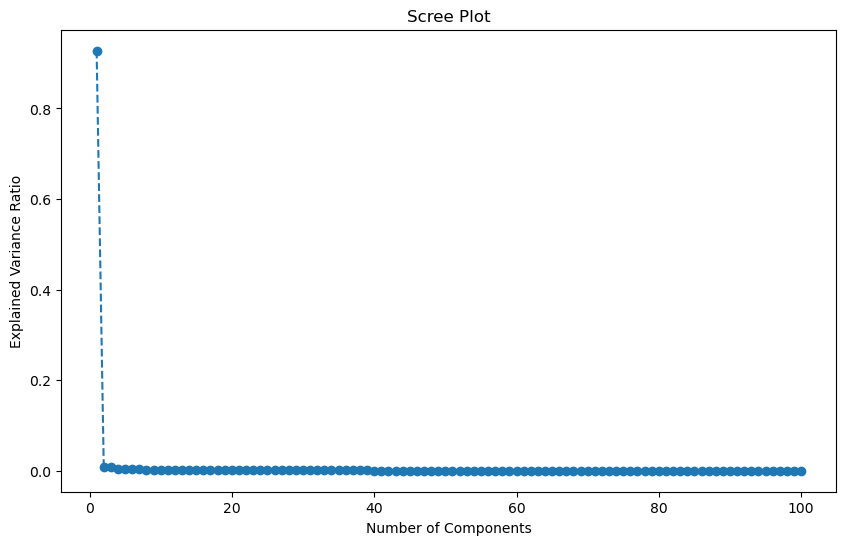

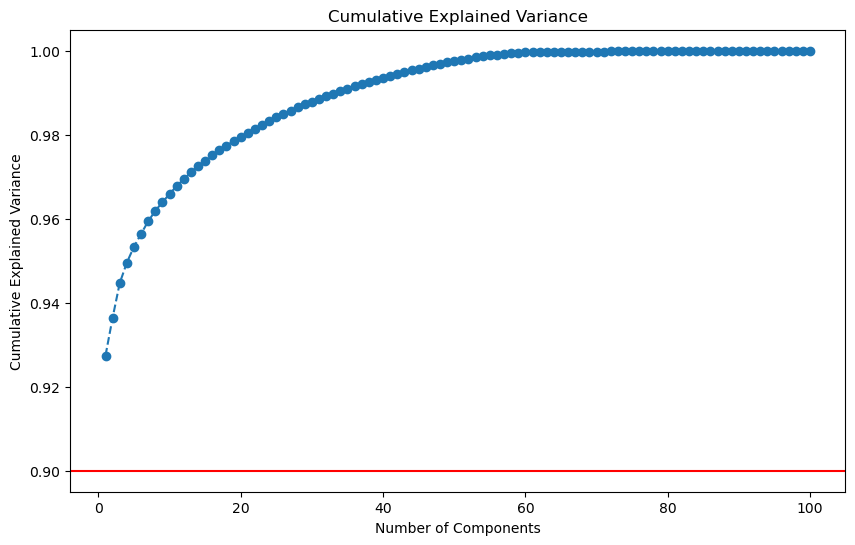

In [59]:
pca = PCA().fit(X_train_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

In [60]:
n_components = 5
pca = PCA(n_components=n_components)

X_Train_pca = pca.fit_transform(X_train_scaled)
X_Test_pca = pca.transform(X_test_scaled)

pca_columns = [f'PC{i+1}' for i in range(n_components)]

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Each Component: {explained_variance}")

total_explained_variance = explained_variance.sum()
print(f"Total Explained Variance: {total_explained_variance}")

Explained Variance by Each Component: [0.92742386 0.00901957 0.00823517 0.00487861 0.00377859]
Total Explained Variance: 0.9533358016145692


In [61]:
X_train = X_Train_pca
X_test = X_Test_pca

In [63]:
results = []

models = {
    'Logistic Regression': LogisticRegression(C=1, penalty='l2', solver='lbfgs', class_weight='balanced', max_iter=1000),
    
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan'),
    
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=10, random_state=42),
    
    'SVM_RBF': SVC(kernel='rbf', C=100, gamma=0.1, probability=True, random_state=42),
    
    'XGBoost': XGBClassifier(
        n_estimators=50,
        learning_rate=0.01,
        max_depth=5,
        scale_pos_weight=2,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),

    'LightGBM': LGBMClassifier(
        n_estimators=100,
        learning_rate=0.01,
        max_depth=20,
        is_unbalance=True,
        random_state=42
    ),

    'Naïve Bayes': GaussianNB(var_smoothing=1e-09),
    
    'Gaussian Process': GaussianProcessClassifier(kernel=RBF(), max_iter_predict=100, multi_class='one_vs_rest', random_state=42),

}


kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Evaluating {name}:")

    scoring_metrics = ['accuracy', 'f1_weighted']
    cv_results = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring_metrics)

    mean_accuracy = cv_results['test_accuracy'].mean()
    mean_f1 = cv_results['test_f1_weighted'].mean()
    print(f"  Cross-validation Accuracy: {mean_accuracy:.4f}")
    print(f"  Cross-validation F1 Score: {mean_f1:.4f}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  
    recall = recall_score(y_test, y_pred, average='weighted')  
    f1 = f1_score(y_test, y_pred, average='weighted')  

    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  Test Precision: {precision:.4f}")
    print(f"  Test Recall: {recall:.4f}")
    print(f"  Test F1 Score: {f1:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    report = classification_report(y_test, y_pred)
    results.append({
        "Model": name,
        "Test Accuracy": accuracy,
        "Test Precision": precision,
        "Test Recall": recall,
        "Test F1": f1,
        "Classification Report": report
    })
    df_results = pd.DataFrame(results)
    
    df_results.to_csv("Topfeatures_Classical.csv", index=False)
    print("Results saved to Topfeatures_Classical.csv")

    print()


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

Evaluating Logistic Regression:
  Cross-validation Accuracy: 0.6744
  Cross-validation F1 Score: 0.6963
  Test Accuracy: 0.6436
  Test Precision: 0.7256
  Test Recall: 0.6436
  Test F1 Score: 0.6721
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       515
           1       0.29      0.51      0.37       136

    accuracy                           0.64       651
   macro avg       0.57      0.59      0.56       651
weighted avg       0.73      0.64      0.67       651

Results saved to Topfeatures_Classical.csv

Evaluating KNN:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when

  Cross-validation Accuracy: 0.7555
  Cross-validation F1 Score: 0.7195
  Test Accuracy: 0.7527
  Test Precision: 0.6849
  Test Recall: 0.7527
  Test F1 Score: 0.7076
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       515
           1       0.26      0.10      0.15       136

    accuracy                           0.75       651
   macro avg       0.53      0.51      0.50       651
weighted avg       0.68      0.75      0.71       651

Results saved to Topfeatures_Classical.csv

Evaluating Random Forest:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array

  Cross-validation Accuracy: 0.7762
  Cross-validation F1 Score: 0.7172


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


  Test Accuracy: 0.7803
  Test Precision: 0.7058
  Test Recall: 0.7803
  Test F1 Score: 0.7153
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.87       515
           1       0.36      0.07      0.11       136

    accuracy                           0.78       651
   macro avg       0.58      0.52      0.49       651
weighted avg       0.71      0.78      0.72       651

Results saved to Topfeatures_Classical.csv

Evaluating SVM_RBF:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d

  Cross-validation Accuracy: 0.7697
  Cross-validation F1 Score: 0.7243


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Test Accuracy: 0.7619
  Test Precision: 0.6909
  Test Recall: 0.7619
  Test F1 Score: 0.7117
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       515
           1       0.29      0.10      0.14       136

    accuracy                           0.76       651
   macro avg       0.54      0.52      0.50       651
weighted avg       0.69      0.76      0.71       651

Results saved to Topfeatures_Classical.csv

Evaluating XGBoost:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is dep

  Cross-validation Accuracy: 0.7474
  Cross-validation F1 Score: 0.7308
  Test Accuracy: 0.7204
  Test Precision: 0.6910
  Test Recall: 0.7204
  Test F1 Score: 0.7038
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       515
           1       0.27      0.20      0.23       136

    accuracy                           0.72       651
   macro avg       0.54      0.53      0.53       651
weighted avg       0.69      0.72      0.70       651

Results saved to Topfeatures_Classical.csv

Evaluating LightGBM:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 438, number of negative: 1642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 450, number of negative: 1631
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216242 -> initscore=-1.287701
[LightGBM] [Info] Start training from score -1.287701
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_lea

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 443, number of negative: 1638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212878 -> initscore=-1.307661
[LightGBM] [Info] Start training from score -1.307661
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_lea

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d

  Cross-validation Accuracy: 0.7624
  Cross-validation F1 Score: 0.7368
  Test Accuracy: 0.7573
  Test Precision: 0.7084
  Test Recall: 0.7573
  Test F1 Score: 0.7244
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       515
           1       0.34      0.17      0.23       136

    accuracy                           0.76       651
   macro avg       0.57      0.54      0.54       651
weighted avg       0.71      0.76      0.72       651

Results saved to Topfeatures_Classical.csv

Evaluating Gaussian Process:


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d

  Cross-validation Accuracy: 0.7866
  Cross-validation F1 Score: 0.7150


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  Test Accuracy: 0.7926
  Test Precision: 0.7483
  Test Recall: 0.7926
  Test F1 Score: 0.7106
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       515
           1       0.57      0.03      0.06       136

    accuracy                           0.79       651
   macro avg       0.68      0.51      0.47       651
weighted avg       0.75      0.79      0.71       651

Results saved to Topfeatures_Classical.csv



In [79]:
models_params = {
    "LR": (LogisticRegression(class_weight='balanced', max_iter=1000), {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'], 
        'solver': ['lbfgs', 'saga']
    }),

    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),

    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),

    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'scale_pos_weight': [1, 2, 4] 
    }),

    "LightGBM": (LGBMClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [1, 10, 20],
        'learning_rate': [0.01, 0.1, 0.2],
        'is_unbalance': [True, False]
    }),

    "SVM-RBF": (SVC(kernel='rbf', probability=True, random_state=42), {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1]
    }),

    "Naïve Bayes": (GaussianNB(), {
        'var_smoothing': [1e-09, 1e-08, 1e-07]
    }),

    "Gaussian Process": (GaussianProcessClassifier(kernel=RBF(), random_state=42), {
        'max_iter_predict': [100, 200],
        'multi_class': ['one_vs_rest', 'one_vs_one']
    })
}

best_models = {}
F1_score_Results = {}

for name, (model, params) in models_params.items():
    print(f"\n Running GridSearch for {name}...")

    grid_search = GridSearchCV(model, params, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
    
    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f" Best Params for {name}: {best_params}")


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



 Running GridSearch for LR...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Best Params for LR: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

 Running GridSearch for KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 Best Params for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

 Running GridSearch for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


 Best Params for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}

 Running GridSearch for XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


 Best Params for XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'scale_pos_weight': 2}

 Running GridSearch for LightGBM...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 563, number of negative: 2038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2601, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216455 -> initscore=-1.286445
[LightGBM] [Info] Start training from score -1.286445
 Best Params for LightGBM: {'is_unbalance': True, 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 100}

 Running GridSearch for SVM-RBF...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Best Params for SVM-RBF: {'C': 100, 'gamma': 0.1}

 Running GridSearch for Naïve Bayes...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
 Best Params for Naïve Bayes: {'var_smoothing': 1e-09}

 Running GridSearch for Gaussian Process...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params

 Best Params for Gaussian Process: {'max_iter_predict': 100, 'multi_class': 'one_vs_rest'}


In [64]:
results = []

def stacking_model(X_train, y_train, X_test, y_test, n_splits=5):
    base_models = [
        ("NB", GaussianNB(var_smoothing=1e-09)),
        ("LR", LogisticRegression(C=1, penalty='l2', solver='lbfgs', class_weight='balanced', max_iter=1000)),
        ("knn", KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan')),
        ("lgbm", LGBMClassifier(n_estimators=100, learning_rate=0.01, max_depth=20, is_unbalance=True, random_state=42))
    ]

    meta_features_train = np.zeros((X_train.shape[0], len(base_models)))
    meta_features_test = np.zeros((X_test.shape[0], len(base_models)))
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    base_model_accuracies = {}
    
    for idx, (name, model) in enumerate(base_models):
        print(f"\nTraining base model: {name}")
        test_fold_preds = np.zeros((X_test.shape[0], n_splits))
        oof_preds = np.zeros(X_train.shape[0])
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
            X_tr, X_val = X_train[train_idx], X_train[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_tr, y_tr)

            if hasattr(model, "predict_proba"):
                val_preds = model.predict_proba(X_val)[:, 1]
                test_preds = model.predict_proba(X_test)[:, 1]
            else:
                val_preds = model.predict(X_val)
                test_preds = model.predict(X_test)

            oof_preds[val_idx] = val_preds
            meta_features_train[val_idx, idx] = val_preds
            test_fold_preds[:, fold] = test_preds
        
        meta_features_test[:, idx] = test_fold_preds.mean(axis=1)
        base_model_accuracies[name] = accuracy_score(y_train, (oof_preds > 0.5).astype(int))
    
    meta_model = XGBClassifier(n_estimators=50, learning_rate=0.01, max_depth=5, scale_pos_weight=2, use_label_encoder=False, eval_metric='logloss', random_state=42)
    meta_oof_preds = np.zeros(X_train.shape[0])
    final_preds_proba = np.zeros(X_test.shape[0])
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(meta_features_train, y_train)):
        X_tr, X_val = meta_features_train[train_idx], meta_features_train[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        meta_model.fit(X_tr, y_tr)

        meta_oof_preds[val_idx] = meta_model.predict_proba(X_val)[:, 1]
        final_preds_proba += meta_model.predict_proba(meta_features_test)[:, 1] / n_splits

    meta_train_acc = accuracy_score(y_train, (meta_oof_preds > 0.5).astype(int))
    
    print("\nBase Model Accuracies:")
    for model_name, acc in base_model_accuracies.items():
        print(f"{model_name}: {acc:.4f}")
    
    print(f"\nMeta Model Training Accuracy: {meta_train_acc:.4f}")

    y_test_preds = (final_preds_proba > 0.5).astype(int)
    print("\nTest Set Evaluation:")
    print(f"Accuracy:  {accuracy_score(y_test, y_test_preds):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_preds, average='weighted'):.4f}")
    print(f"Recall:    {recall_score(y_test, y_test_preds, average='weighted'):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_test_preds, average='weighted'):.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_preds))

    
    accuracy = accuracy_score(y_test, y_test_preds)
    precision = precision_score(y_test, y_test_preds, average='weighted')
    recall = recall_score(y_test, y_test_preds, average='weighted')
    f1 = f1_score(y_test, y_test_preds, average='weighted')
    
    report = classification_report(y_test, y_test_preds)
    
    results.append({
        "Model": "Stacking",
        "Test Accuracy": accuracy,
        "Test Precision": precision,
        "Test Recall": recall,
        "Test F1": f1,
        "Classification Report": report
    })
    
    df_results = pd.DataFrame(results)
    df_results.to_csv("Topfeatures_Ensemble.csv", index=False)
    print("Results saved to Topfeatures_Ensemble.csv")
    
    return y_test_preds


In [65]:
stacking_preds = stacking_model(X_train, y_train, X_test, y_test)


Training base model: NB

Training base model: LR

Training base model: knn

Training base model: lgbm
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 450, number of negative: 1630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2080, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216346 -> initscore=-1.287088
[LightGBM] [Info] Start training from score -1.287088


C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 451, number of negative: 1630
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216723 -> i

C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\USER\anaconda3\envs\eeg_project\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 450, number of negative: 1631
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216242 -> initscore=-1.287701
[LightGBM] [Info] Start training from score -1.287701
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_lea